![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

## 2. Setting Options

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

In [4]:
#Extract File
os.chdir("/content/drive/MyDrive/CNNLab")
from zipfile import ZipFile
with ZipFile('mobile-images-20210309T085357Z-001.zip', 'r') as z:  
 z.extractall()

In [5]:
no_mobile_path = "/content/drive/MyDrive/CNNLab/mobile-images/no-mobile"
yes_mobile_path = "/content/drive/MyDrive/CNNLab/mobile-images/yes-mobile"

In [6]:
print("No Mobile Images: ", len(os.listdir(no_mobile_path)))
print("Yes Mobile Images: ", len(os.listdir(yes_mobile_path)))

No Mobile Images:  121
Yes Mobile Images:  124


In [7]:
import cv2
from google.colab.patches import cv2_imshow

(90, 90, 3)


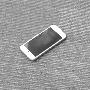

In [8]:
yes_mobile = os.listdir(yes_mobile_path)
img0 = cv2.imread(yes_mobile_path + "/"+ yes_mobile[0])
print(img0.shape)
cv2_imshow(img0)

(90, 90, 3)


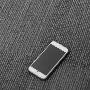

In [9]:
img1 = cv2.imread(yes_mobile_path + "/"+ yes_mobile[1])
print(img1.shape)
cv2_imshow(img1)

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [10]:
# Read and save YES-Mobile images and corresponding label as 1
yes_mobile = os.listdir(yes_mobile_path)
x_yes = []
y_yes = []

for i in yes_mobile:
  img = cv2.imread(os.path.join(yes_mobile_path,i))
  img = cv2.resize(img,(128,128))
  x_yes.append(img)
  y_yes.append(1)

In [11]:
# Read and save NO-Mobile images and corresponding label as 0
no_mobile = os.listdir(no_mobile_path)
x_no = []
y_no = []

for i in no_mobile:
  img = cv2.imread(os.path.join(no_mobile_path,i))
  img = cv2.resize(img,(128,128))
  x_no.append(img)
  y_no.append(0)

### Check shape and size of the images

In [12]:
print(x_yes[0].shape)
print(y_yes[0])

(128, 128, 3)
1


In [13]:
print(x_no[0].shape)
print(y_no[0])

(128, 128, 3)
0


###  What is the percentage of images with and without mobile phone in the data

In [14]:
No_mobile_percent = (len(os.listdir(no_mobile_path))/(len(os.listdir(no_mobile_path))+len(os.listdir(yes_mobile_path))))*100
print("Percentage of NO Mobile Images : ", No_mobile_percent , "%")

Percentage of NO Mobile Images :  49.38775510204081 %


In [15]:
Yes_mobile_percent = (len(os.listdir(yes_mobile_path))/(len(os.listdir(no_mobile_path))+len(os.listdir(yes_mobile_path)))) *100
print("Percentage of YES Mobile Images : ", Yes_mobile_percent , "%")

Percentage of YES Mobile Images :  50.61224489795918 %


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [16]:
X= np.concatenate((x_yes,x_no), axis = 0)
Y= np.concatenate((y_yes,y_no), axis = 0)

print(X.shape)
print(Y.shape)

(245, 128, 128, 3)
(245,)


### Shuffle the above data and labels ( Data and label should be in sync)

In [17]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [18]:
Y

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0])

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

The below image is of class :  1


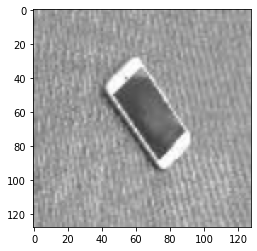

The below image is of class :  0


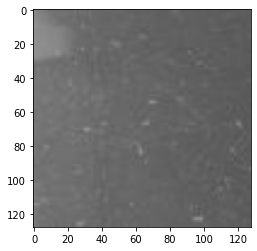

The below image is of class :  1


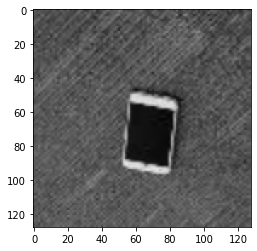

The below image is of class :  1


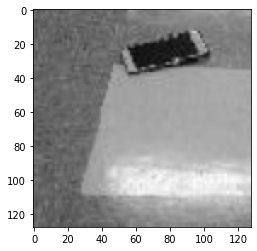

The below image is of class :  0


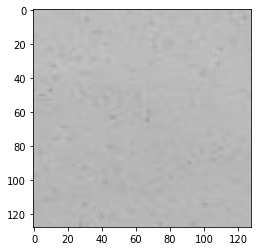

The below image is of class :  0


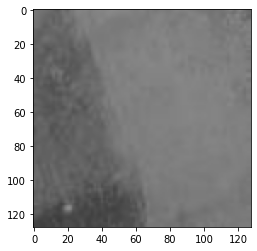

The below image is of class :  0


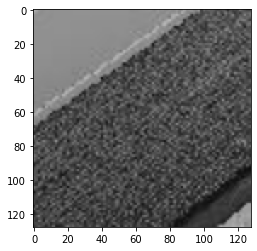

The below image is of class :  0


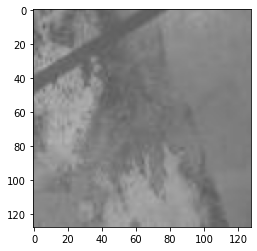

The below image is of class :  1


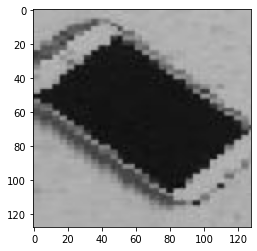

The below image is of class :  1


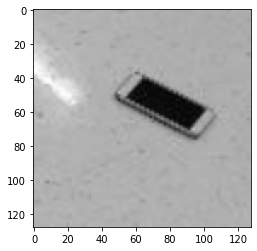

In [19]:
#Visualaize first 10 images with corresponding labels
for i in range(10):
  label = Y[i]
  img=X[i]
  print("The below image is of class : ", label)
  plt.imshow(img)
  plt.show()
  print("==================================")

### Split the data into train and test

In [20]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

### Print shape of the X train and X test data

In [21]:
print(X_train.shape , X_test.shape)


(171, 128, 128, 3) (74, 128, 128, 3)


In [22]:
print("Train Image Count : ", len(y_train))
print("Test Image Count : ", len(y_test))

Train Image Count :  171
Test Image Count :  74


### Normalize the data by dividing by 255

In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [24]:
import tensorflow as tf
num_classes =2
trainY = tf.keras.utils.to_categorical(y_train, num_classes)
testY = tf.keras.utils.to_categorical(y_test, num_classes)

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [25]:
# Create model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam

#Clear out model from current memory
tf.keras.backend.clear_session()

row = 128
col = 128
channels = 3
n_classes = 2
n_epochs = 50
batch_size = 32

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Conveolution Layer
model1.add(Conv2D(32, kernel_size= 3, activation= 'relu', input_shape = (row,col,channels)))

#MaxPool Layer
model1.add(MaxPooling2D((2,2)))

#Conveolution Layer
model1.add(Conv2D(64, kernel_size= 3, activation= 'relu'))

#MaxPool Layer
model1.add(MaxPooling2D((2,2)))

#Faltten before feeding inti Dense layer
model1.add(Flatten())

#Output layer contains 2 nodes for 2 classes
model1.add(Dense(n_classes, activation ='softmax'))


In [26]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 115202    
Total params: 134,594
Trainable params: 134,594
Non-trainable params: 0
__________________________________________________

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [27]:
#Specify Loss and Optimizer
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [28]:
history1 = model1.fit(X_train, trainY , batch_size = batch_size, epochs = n_epochs,verbose=1, validation_data=(X_test, testY))

Epoch 1/50
6/6 [==============================] - 4s 131ms/step - loss: 1.5289 - accuracy: 0.4807 - val_loss: 0.7172 - val_accuracy: 0.5541
Epoch 2/50
6/6 [==============================] - 0s 25ms/step - loss: 0.7016 - accuracy: 0.5014 - val_loss: 0.6162 - val_accuracy: 0.7973
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5962 - accuracy: 0.8721 - val_loss: 0.5492 - val_accuracy: 0.7703
Epoch 4/50
6/6 [==============================] - 0s 24ms/step - loss: 0.4882 - accuracy: 0.8692 - val_loss: 0.4465 - val_accuracy: 0.8108
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 0.3685 - accuracy: 0.8692 - val_loss: 0.3575 - val_accuracy: 0.8649
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 0.2799 - accuracy: 0.8892 - val_loss: 0.3763 - val_accuracy: 0.8514
Epoch 7/50
6/6 [==============================] - 0s 24ms/step - loss: 0.2630 - accuracy: 0.9110 - val_loss: 0.3808 - val_accuracy: 0.8514
Epoch 8/50
6/6 [==========

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [29]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(X_test, testY)
print("test loss:", results[0])
print("test accuracy:", results[1])

Evaluate on test data
3/3 [==============================] - 0s 6ms/step - loss: 1.3383 - accuracy: 0.8514
test loss: 1.3383419513702393
test accuracy: 0.8513513803482056


### Predict label data of the test data and check confusion matrix

In [30]:
predictions = model1.predict(X_test)
y_pred = np.argmax(predictions,1)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0])

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[27  6]
 [ 5 36]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.86      0.88      0.87        41

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



### Display test images and their predicted label for a few samples

The below image is of Predicted class :  0
The below image is of Actual    class :  0
Corerct Prediction


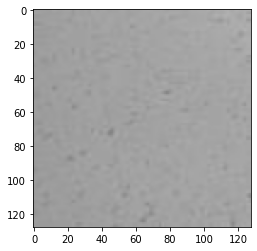

The below image is of Predicted class :  1
The below image is of Actual    class :  1
Corerct Prediction


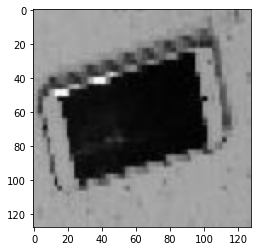

The below image is of Predicted class :  1
The below image is of Actual    class :  1
Corerct Prediction


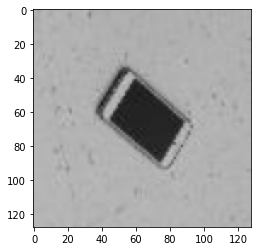

The below image is of Predicted class :  0
The below image is of Actual    class :  0
Corerct Prediction


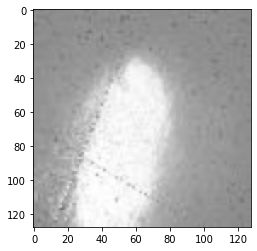

The below image is of Predicted class :  0
The below image is of Actual    class :  0
Corerct Prediction


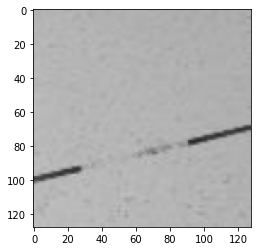

The below image is of Predicted class :  1
The below image is of Actual    class :  1
Corerct Prediction


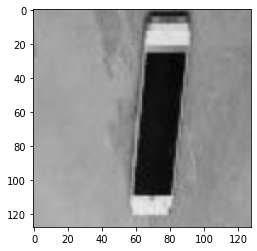

The below image is of Predicted class :  0
The below image is of Actual    class :  0
Corerct Prediction


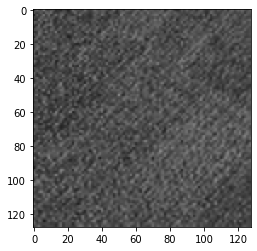

The below image is of Predicted class :  1
The below image is of Actual    class :  1
Corerct Prediction


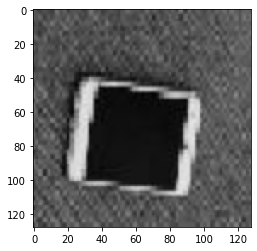

The below image is of Predicted class :  0
The below image is of Actual    class :  0
Corerct Prediction


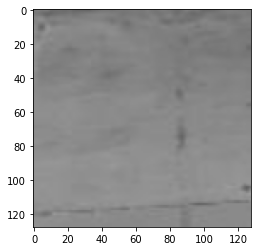

The below image is of Predicted class :  1
The below image is of Actual    class :  1
Corerct Prediction


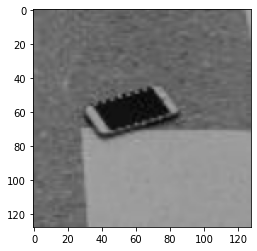

In [33]:
for i in range(10):
  label_pred = y_pred[i]
  label_actual = y_test[i]
  img = X_test[i]
  print("The below image is of Predicted class : ", label_pred)
  print("The below image is of Actual    class : ", label_pred)
  if (label_pred != label_actual):
    print("Incorrect Prediction")
  else:
    print("Corerct Prediction")
    
  plt.imshow(img)
  plt.show()
  print("==================================")

This is 0 and predited label is 1


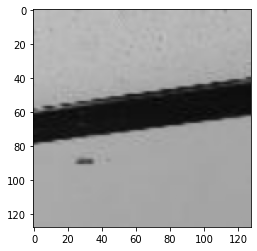

This is 1 and predited label is 0


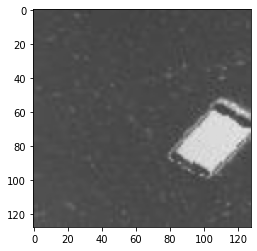

This is 1 and predited label is 0


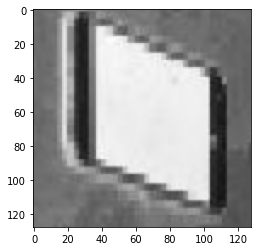

This is 0 and predited label is 1


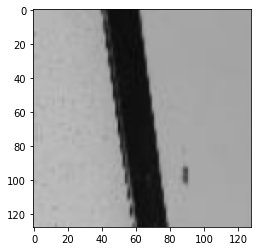

This is 0 and predited label is 1


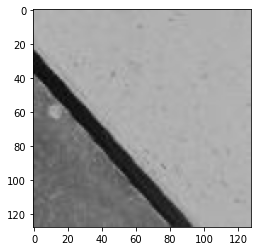

This is 0 and predited label is 1


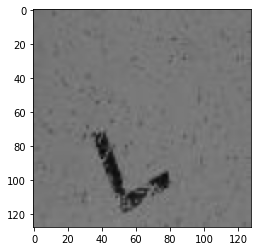

This is 1 and predited label is 0


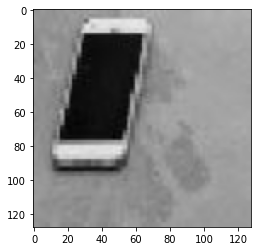

This is 0 and predited label is 1


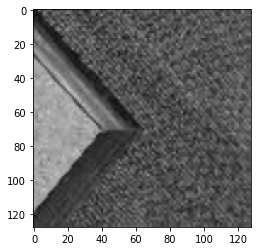

This is 1 and predited label is 0


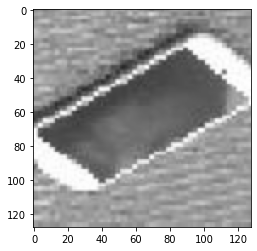

This is 0 and predited label is 1


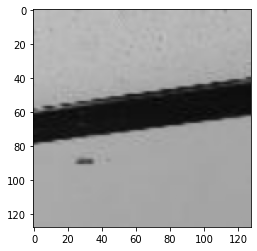

This is 1 and predited label is 0


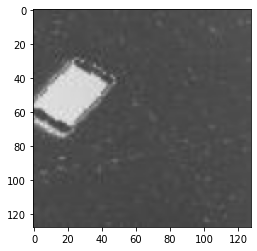

In [34]:
# Lets show all the Incorrect predictions

for i in range(X_test.shape[0]): 
  label = y_pred[i] 
  actual = y_test[i]
  if label != actual:    
    img = X_test[i]  
    print('This is {} and predited label is {}' .format(actual,label) )
    plt.imshow(img);   
    plt.show()

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

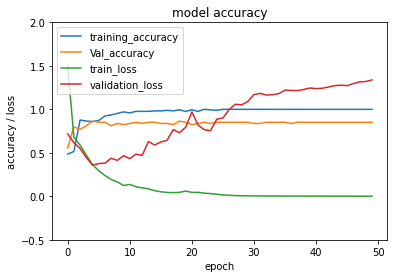

In [35]:
fig, axs = plt.subplots()
axs.set_ylim([-0.5,2])
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'Val_accuracy', 'train_loss','validation_loss'], loc='best')
plt.show()

## 7.  Conclusion and Interpretation

### Write your observations and findings

Training accuracy increased initially but then quickly reached 100%, the training loss decreased correspondingly.

With Training Accuracy of 100% and Test Accuracy of 85% the simple CNN model1 we created above is an Overfit model and seems to give a lot of scope for improvement.

Though validation accuracy increased, but it also got stagnated around 85%. However the validation loss kept increasing till the end.

We see that there were many images with clear picture of a mobile phone which the model was unable to detect.


## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

Let's use the same mode created earlier , but now with LOSS function as SGD and see te results


In [36]:
#Specify Loss and Optimizer as SGD this time
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history1 = model1.fit(X_train, trainY , batch_size = batch_size, epochs = n_epochs,verbose=1, validation_data=(X_test, testY))

Epoch 1/50
6/6 [==============================] - 1s 53ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.3246 - val_accuracy: 0.8514
Epoch 2/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3208 - val_accuracy: 0.8514
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.3229 - val_accuracy: 0.8514
Epoch 4/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3122 - val_accuracy: 0.8514
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3218 - val_accuracy: 0.8514
Epoch 6/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.3265 - val_accuracy: 0.8514
Epoch 7/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3250 - val_accuracy: 0.8514
Epoch 8/50
6/6 [===========

In [38]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results1 = model1.evaluate(X_test, testY)
print("test loss:", results1[0])
print("test accuracy:", results1[1])

Evaluate on test data
3/3 [==============================] - 0s 6ms/step - loss: 1.3675 - accuracy: 0.8514
test loss: 1.367526888847351
test accuracy: 0.8513513803482056


In [39]:
predictions1 = model1.predict(X_test)
y_pred1 = np.argmax(predictions1,1)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[27  6]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.86      0.88      0.87        41

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



Reults are similar to that obtained from Adam, with 85% accuracy. Now, lets build a deeper model with additional Conv layer. Also we will add Dropout layer and see if that helps improve on reducing overfitting.

In [47]:
# Create model2
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam

#Clear out model from current memory
tf.keras.backend.clear_session()

row = 128
col = 128
channels = 3
n_classes = 2
n_epochs = 50
batch_size = 32

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Conveolution Layer
model2.add(Conv2D(32, kernel_size= 3, activation= 'relu', input_shape = (row,col,channels)))

#MaxPool Layer
model2.add(MaxPooling2D((2,2)))

#Dropout layer
model2.add(tf.keras.layers.Dropout(0.5))

#Conveolution Layer
model2.add(Conv2D(64, kernel_size= 3, activation= 'relu'))

#MaxPool Layer
model2.add(MaxPooling2D((2,2)))

#Dropout layer
model2.add(tf.keras.layers.Dropout(0.4))

#Conveolution Layer
model2.add(Conv2D(64, kernel_size= 3, activation= 'relu'))

#MaxPool Layer
model2.add(MaxPooling2D((2,2)))


#Faltten before feeding into Dense layer
model2.add(Flatten())

#Output layer contains 2 nodes for 2 classes
model2.add(Dense(n_classes, activation ='softmax'))


In [48]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [49]:
#Specify Loss and Optimizer as ADAM this time
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history2 = model2.fit(X_train, trainY , batch_size = batch_size, epochs = n_epochs,verbose=1, validation_data=(X_test, testY))

Epoch 1/50
6/6 [==============================] - 1s 59ms/step - loss: 1.1269 - accuracy: 0.4867 - val_loss: 0.6981 - val_accuracy: 0.4459
Epoch 2/50
6/6 [==============================] - 0s 29ms/step - loss: 0.7124 - accuracy: 0.5173 - val_loss: 0.6923 - val_accuracy: 0.5541
Epoch 3/50
6/6 [==============================] - 0s 28ms/step - loss: 0.6929 - accuracy: 0.4979 - val_loss: 0.6915 - val_accuracy: 0.5405
Epoch 4/50
6/6 [==============================] - 0s 28ms/step - loss: 0.6927 - accuracy: 0.4691 - val_loss: 0.6904 - val_accuracy: 0.5270
Epoch 5/50
6/6 [==============================] - 0s 26ms/step - loss: 0.6886 - accuracy: 0.5247 - val_loss: 0.6886 - val_accuracy: 0.5541
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.6868 - accuracy: 0.6111 - val_loss: 0.6885 - val_accuracy: 0.8649
Epoch 7/50
6/6 [==============================] - 0s 26ms/step - loss: 0.6840 - accuracy: 0.6523 - val_loss: 0.6815 - val_accuracy: 0.8243
Epoch 8/50
6/6 [===========

In [51]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results2 = model2.evaluate(X_test, testY)
print("test loss:", results2[0])
print("test accuracy:", results2[1])

Evaluate on test data
3/3 [==============================] - 0s 7ms/step - loss: 1.6043 - accuracy: 0.8784
test loss: 1.604266881942749
test accuracy: 0.8783783912658691


In [52]:
predictions2 = model2.predict(X_test)
y_pred2 = np.argmax(predictions2,1)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[27  6]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.86      0.93      0.89        41

    accuracy                           0.88        74
   macro avg       0.88      0.87      0.88        74
weighted avg       0.88      0.88      0.88        74



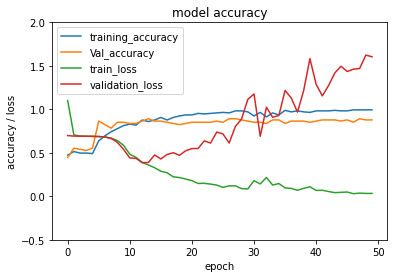

In [53]:
fig, axs = plt.subplots()
axs.set_ylim([-0.5,2])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'Val_accuracy', 'train_loss','validation_loss'], loc='best')
plt.show()

Dropout layer helped the model to learn better this time. Also, Test accuracy is increased by 2% from our previous model as this new model2 achieved 88% test accuracy with additional convolution and dropout layers while earlier model test accuracy was 85%. This proves with additional layers this model is better.